Перш за все встановимо потрібні бібліотеки

In [1]:
# !pip install sympy numpy scipy matplotlib torch torchquad -q

import numpy as np
from sympy import diff, cos, sin, pi, evalf, Symbol, lambdify, integrate
from scipy import integrate as sp_integrate
import matplotlib.pyplot as plt
import time

##**1 завдання** (1 бал)
Обчислити інтеграли поданими способами:

- За означенням: $∫_a^bf(x)dx = {\displaystyle lim_{n-> +∞}\sum \limits _{i=1}^{n}{f(\xi _{i})\Delta x_{i}}}, де \quad \xi_i \in  [x_i, x_{i+1}]$ для певного розбиття на $[a, b]$
*    Методом трапецій: замість вибору будь-якої точки $ξ_i$ на $[x_i, x_{i+1}]$, беруть середнє значення на кінцях відрізків: ${\displaystyle \int _{a}^{b}f(x)\,dx=\sum _{i=1}^{n}\int _{x_{i-1}}^{x_{i}}f(x)\,dx\approx \sum _{i=1}^{n}{\frac {f(x_{i})+f(x_{i-1})}{2}}\Delta x_{i},}$.

  Якщо ділити $[a, b]$ на $n$ рівних частин то формула набуває вигляду: ${\displaystyle \int _{a}^{b}f(x)\,dx\approx \left({\frac {f(a)+f(b)}{2}}+\sum _{i=1}^{n-1}f(x_{i})\right)⋅\frac{b-a}{n}}$
- за допомогою бібліотеки SciPy

Для цього рекомендуємо використати бібліотеку sympy, яка допоможе швидше проводити обчислювання
Щоб інсталювати її, запустіть наступну комірку:

In [2]:
# знайдемо похідну функції cos(x) по x
x = Symbol("x")
derivative = diff(cos(x), x)
derivative

-sin(x)

In [3]:
# знайдемо другу похідну cos(x) по x
second_derivative = diff(cos(x), x, 2)
second_derivative

-cos(x)

In [ ]:
# для обчислення результату можна скористатись функцією evalf, де subs - словник аргументів
derivative.evalf(subs={x: pi/2}) # -sin(pi/2)

-1.00000000000000

In [5]:
# невизначений і визначений інтеграл
print(integrate(sin(x), x))
print(integrate(x**2, (x, 3, 9)))

-cos(x)
234


Почитати більше прикольних штук про sympy можете ось тут: https://www.datacamp.com/tutorial/sympy


In [4]:
def riemann_method(func, a: float, b: float, n: int) -> float:
    """
    [a, b] - interval
    n - number of subintervals in the partition. points in them are chosen randomly
    func = cos(x), for example, where x = Symbol("x")
    Must return the approximate value of the integral of 'func' on [a, b]
    """

    x = Symbol("x")
    f = lambdify(x, func, "numpy")  # перетворюємо SymPy-вираз у функцію

    delta_x = (b - a) / n  # ширина підінтервалу
    result = 0

    for i in range(n):
        x_left = a + i * delta_x
        x_right = x_left + delta_x
        xi = np.random.uniform(x_left, x_right)  # випадкова точка у підінтервалі
        result += f(xi) * delta_x

    return result

def trapezoidal_method(func, a: float, b: float, n: int) -> float:
    """
    [a, b] - interval
    n - number of subintervals in the partition (all should be the same size)
    func = 1/x, for example, where x = Symbol("x")
    Must return the approximate value of the integral of 'func' on [a, b]
    """

    x = Symbol("x")
    f = lambdify(x, func, "numpy")

    horizontal_step = (b - a) / n
    x_values = np.linspace(a, b, n + 1)
    y_values = f(x_values)

    return horizontal_step * ((y_values[0] + y_values[-1])/2 + np.sum(y_values[1:-1]))

def easy_sci_py(func, a: float, b: float) -> float:
    """
    Computes the integral using SciPy's quad() method
    func = tg(x), for example, where x = Symbol("x")
    Must return highly accurate approximation of the integral
    """
    x = Symbol("x")
    f = lambdify(x, func, "numpy")

    result, _ = sp_integrate.quad(f, a, b)
    return result

def compare_accuracy(func, a: float, b: float, n: int):
    """
    Compares the real integral value and the one received from two upper functions.
    """
    r = riemann_method(func, a, b, n)
    t = trapezoidal_method(func, a, b, n)
    exact = easy_sci_py(func, a, b)

    print("=== Порівняння точності на [{}, {}], n = {} ===".format(a, b, n))
    print(f"Точний (SymPy): ≈ {exact:.10f}")
    print(f"Метод Рімана: {r:.10f},  помилка = {abs(r-exact):.3e}")
    print(f"Метод трапецій: {t:.10f},  помилка = {abs(t-exact):.3e}")

In [11]:
if __name__ == '__main__':
    x = Symbol("x")
    func = sin(x) + x**2

    compare_accuracy(func, 0, 1, 100000)

    func = 1/x

    compare_accuracy(func, 1, 5, 100000)

=== Порівняння точності на [0, 1], n = 100000 ===
Точний (SymPy): ≈ 0.7930310275
Метод Рімана: 0.7930310210,  помилка = 6.449e-09
Метод трапецій: 0.7930310275,  помилка = 1.284e-11
=== Порівняння точності на [1, 5], n = 100000 ===
Точний (SymPy): ≈ 1.6094379124
Метод Рімана: 1.6094379498,  помилка = 3.739e-08
Метод трапецій: 1.6094379126,  помилка = 1.280e-10


## **2 завдання** (1 бал)
Напишіть функцію, яка буде порівнювати час роботи попередньо написаних методів (за означенням, за методом трапеції та вбудованим методом в scipy), а також не забудьте побудувати графік часу роботи.

(Рекомендуємо використовувати time.time()для вимірювання часу)

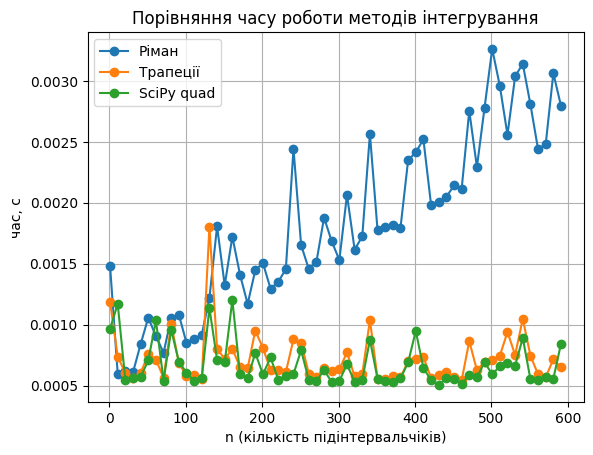

In [9]:
def compare_time(func, a, b, n_values):
  """ Compare speed of calculating by Rimman and Trapezoid"""
  #Тут має бути ваш код
  riemann_times = []
  trapezoid_times = []
  scipy_times = []
  n_values = list(range(1, n_values))
  for n in n_values:
      # Ріман
      t0 = time.time()
      riemann_method(func, a, b, n)
      t1 = time.time()

      # Трапеції
      trapezoidal_method(func, a, b, n)
      t2 = time.time()

      # SciPy (n не використовується, але викликаємо для порівняння)
      easy_sci_py(func, a, b)
      t3 = time.time()
      if n % 10 == 1:
        riemann_times.append(t1 - t0)
        trapezoid_times.append(t2 - t1)
        scipy_times.append(t3 - t2)
  n_values = [n for n in n_values if n % 10 == 1]
  plt.figure()
  plt.plot(n_values, riemann_times, "o-", label="Ріман")
  plt.plot(n_values, trapezoid_times, "o-", label="Трапеції")
  plt.plot(n_values, scipy_times, "o-", label="SciPy quad")
  plt.xlabel("n (кількість підінтервальчіків)")
  plt.ylabel("час, с")
  plt.title("Порівняння часу роботи методів інтегрування")
  plt.grid(True)
  plt.legend()

if __name__ == '__main__':
  x = Symbol("x")
  func = sin(x) + x**2
  compare_time(func, 2, 5, 593)


## **3 завдання** (1 бал)

Для різних функцій варто показати, що у методі трапецій, де застосовується розбиття інтервалу інтегрування на $n$ рівних відрізків похибка зменшується як $O(1/n^2)$, де $n$ - кількість підінтервалів у розбитті.

Для цього викличте ```trapezoidal_method``` для різних $n$, та наведіть графік похибки в залежності від $n$.



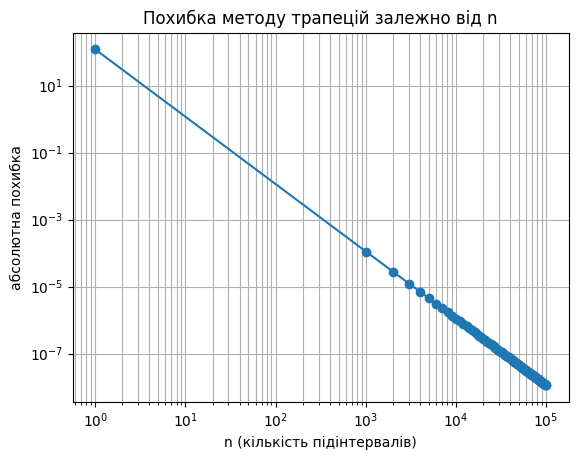

In [10]:
def get_plot_of_error(func, a: float, b: float):
    """
    Consider different n to see the error decrease, then plot the result
    """
    n_values = np.linspace(1, 100000, 100, dtype=int)
    error = []
    for n in n_values:
        tr = trapezoidal_method(func, a, b, n)
        sp = easy_sci_py(func, a, b)
        error.append(abs(sp - tr))

    plt.figure()
    plt.loglog(n_values, error, "o-")
    plt.xlabel("n (кількість підінтервалів)")
    plt.ylabel("абсолютна похибка")
    plt.title("Похибка методу трапецій залежно від n")
    plt.grid(True, which="both")

if __name__ == '__main__':
    x = Symbol("x")
    func = sin(x) + x**2
    get_plot_of_error(func, 1, 10)

Демонстрацію роботи усіх функцій зробіть через if __name__ == "__main__"

**Місце для ваших висновків:**

In [ ]:
#Тут мають бути мудрі висновки та ваш креатив
'''
Точність: Метод трапецій показав значно вищу точність порівняно з методом Рімана, оскільки краще апроксимує форму кривої. Еталоном точності залишається бібліотечна функція scipy.integrate.quad.

Аналіз похибки: Графік підтвердив, що похибка методу трапецій зменшується пропорційно 1/n2 (квадратична збіжність).

Підсумок: Для навчальних цілей ручна реалізація корисна, але в реальних задачах слід використовувати адаптивні методи з бібліотеки SciPy через їхню швидкість та надійність.
'''